In [19]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )
import pandas as pd
#%cd /content/drive/My Drive/bases_mentoria/
path= '/content/drive/My Drive/viajes tarjeta'

import glob
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding='latin-1', sep=","))

# Concatenate all data into one DataFrame
conteo_viajes_tarjeta = pd.concat(dfs, ignore_index=True)


Mounted at /content/drive/


In [20]:
conteo_viajes_tarjeta.shape

(20099603, 5)

In [21]:
# CUANTAS TARJETAS DISTINTAS FUERON USADAS EN EL AÑO AL MENOS UNA VEZ?#
conteo_viajes_tarjeta.TARJETA.nunique()

118691

In [22]:
sum(conteo_viajes_tarjeta.VIAJES_POR_TARJETA_DIA)

46810109

In [23]:
conteo_viajes_tarjeta.head()

,dia2,VIAJES_POR_TARJETA_DIA,VIAJES_POR_TARJETA_MES,MES,TARJETA
0,2019-01-01,1,32,2019-01,4992639
1,2019-03-10,5,67,2019-03,5422225
2,2019-03-10,1,38,2019-03,5070060
3,2019-03-10,6,23,2019-03,5808680
4,2019-03-10,2,28,2019-03,5994764


In [24]:
conteo_viajes_tarjeta.dia2.nunique()


365

In [25]:
# ANALISIS VIAJES POR DIA Y POR TARJETA#
df1=conteo_viajes_tarjeta 
df1.VIAJES_POR_TARJETA_DIA.describe().apply(lambda s: '{0:.2f}'.format(s))



count    20099603.00
mean            2.33
std             1.26
min             1.00
25%             2.00
50%             2.00
75%             3.00
max            62.00
Name: VIAJES_POR_TARJETA_DIA, dtype: object

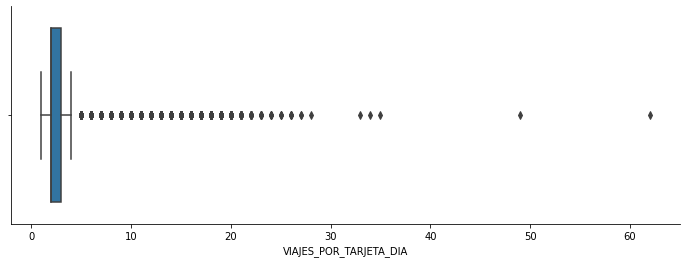

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.boxplot(x=df1.VIAJES_POR_TARJETA_DIA)
sns.despine()

In [27]:
# Eliminamos outliers#
# Eliminamos 1% de los datos#
df1['VIAJES_POR_TARJETA_DIA'].quantile([.95,.96,.97, .98, .99, .995, .998])
df1= df1[df1['VIAJES_POR_TARJETA_DIA'] < df1['VIAJES_POR_TARJETA_DIA'] .quantile(0.99)]

Text(0.5, 1.0, 'Distribución de los viajes por dia por tarjeta')

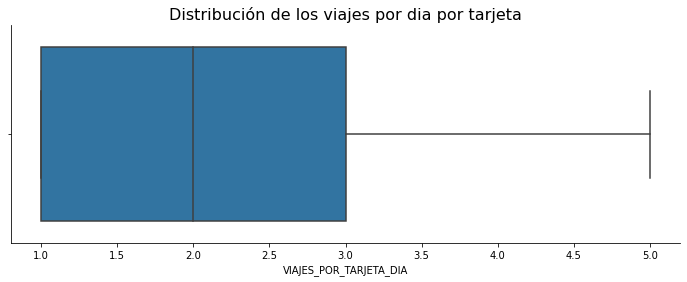

In [42]:
# Distribución de los viajes por dia por tarjeta#
plt.figure(figsize=(12, 4))
sns.boxplot(x=df1.VIAJES_POR_TARJETA_DIA)
sns.despine()
plt.title('Distribución de los viajes por dia por tarjeta', Fontsize=16)

Text(0.5, 1.0, 'Distribución de los viajes por tarjeta y dia')

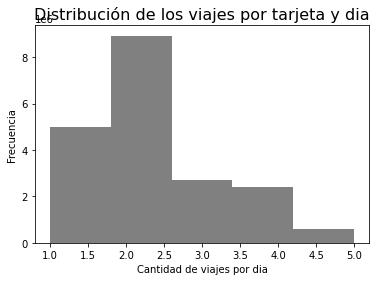

In [44]:
# Observamos los datos en un histograma
plt.hist(df1['VIAJES_POR_TARJETA_DIA'], color='grey', bins=5)
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de viajes por dia')
plt.title('Distribución de los viajes por tarjeta y dia', Fontsize=16)

In [45]:
# ANALISIS VIAJES POR MES Y POR TARJETA#
##Eliminamos duplicados para hacer el análisis de conteos mensuales por tarjeta#
df2=conteo_viajes_tarjeta
df2=df2.drop_duplicates(['VIAJES_POR_TARJETA_MES', 'MES', 'TARJETA'])
df2.VIAJES_POR_TARJETA_MES.describe().apply(lambda s: '{0:.2f}'.format(s))

count    1299936.00
mean          36.01
std           21.30
min            1.00
25%           22.00
50%           33.00
75%           47.00
max          270.00
Name: VIAJES_POR_TARJETA_MES, dtype: object

In [31]:
# Eliminamos outliers#
# Eliminamos 1% de los datos#
df2['VIAJES_POR_TARJETA_MES'].quantile([.95,.96,.97, .98, .99, .995, .998])
df2= df2[df2['VIAJES_POR_TARJETA_MES'] < df2['VIAJES_POR_TARJETA_MES'] .quantile(0.99)]

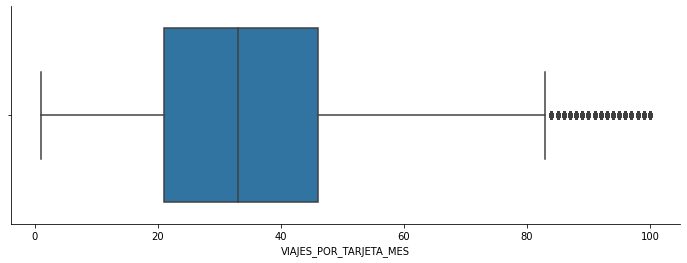

In [32]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df2.VIAJES_POR_TARJETA_MES)
sns.despine()

Text(0.5, 1.0, 'Distribución de los viajes por mes por tarjeta')

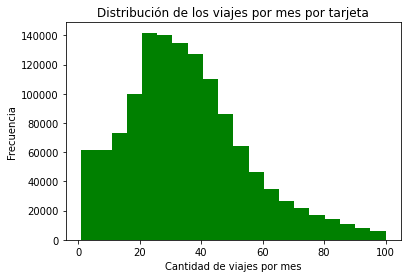

In [33]:
# Observamos los datos en un histograma
plt.hist(df2['VIAJES_POR_TARJETA_MES'], color='green', bins=20)
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de viajes por mes')
plt.title('Distribución de los viajes por mes por tarjeta')